In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
X = wine_quality.data.features 
y_raw = wine_quality.data.targets 

from collections import defaultdict
d = defaultdict(int)
d[6] = 1
d[5] = 2

y = y_raw['quality'].map(d)

In [2]:
X.shape, y.shape

((6497, 11), (6497,))

In [3]:
y.value_counts()

quality
1    2836
2    2138
0    1523
Name: count, dtype: int64

In [6]:
X.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


In [7]:
import matplotlib.pyplot as plt

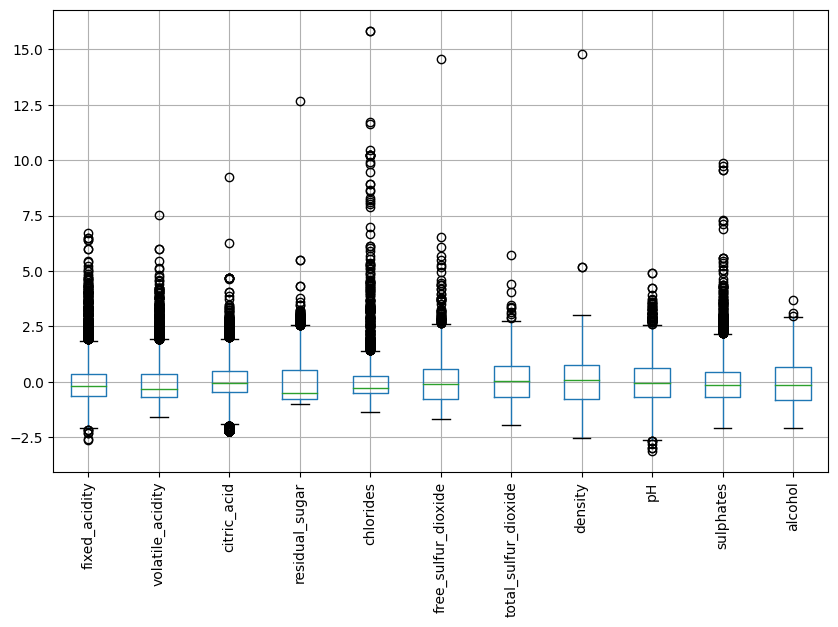

In [8]:
#Univariate analysis
# Distribution of data in columns

num_cols = X.select_dtypes(include=['number']).columns
X_num = (X[num_cols] - X[num_cols].mean())/X[num_cols].std()

X_num.boxplot(figsize=(10, 6))
plt.xticks(rotation=90)
plt.show()

In [9]:
outliers = {}

for col in num_cols:

    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR


    outlier_filter = X[(X[col] < lower_bound) | (X[col] > upper_bound)]
    outliers[col] = round(len(outlier_filter) * 100/ len(X), 2)

outliers

{'fixed_acidity': 5.49,
 'volatile_acidity': 5.8,
 'citric_acid': 7.83,
 'residual_sugar': 1.82,
 'chlorides': 4.4,
 'free_sulfur_dioxide': 0.95,
 'total_sulfur_dioxide': 0.15,
 'density': 0.05,
 'pH': 1.12,
 'sulphates': 2.94,
 'alcohol': 0.05}

In [10]:
X_num.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
fixed_acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452
volatile_acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640
citric_acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493
residual_sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916
free_sulfur_dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838
total_sulfur_dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029


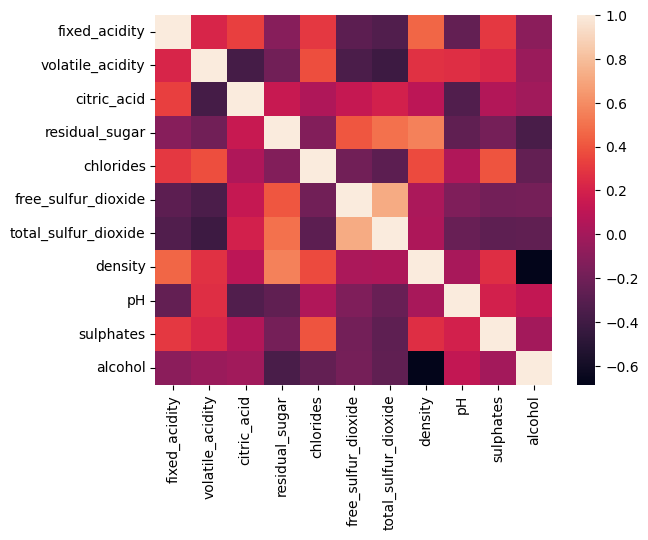

In [11]:
import seaborn as sns
sns.heatmap(X_num.corr())
plt.show()

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train_, X_test, y_train_, y_test = train_test_split(X, y, test_size=0.25)
X_train, X_val, y_train, y_val = train_test_split(X_train_, y_train_)

print(f"{X_train.shape}, {y_train.shape}, {X_val.shape}, {y_val.shape}, {X_test.shape}, {y_test.shape}")

(3654, 11), (3654,), (1218, 11), (1218,), (1625, 11), (1625,)


In [39]:
## Model

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.pipeline import Pipeline

In [47]:
lr_params = {
    'classifier__penalty': ['l2', None],
    'classifier__max_iter': [5000, 10000]
}
lr = LogisticRegression()

rf_params = {
    'classifier__n_estimators': [5, 6, 7, 8, 10],
    'classifier__max_depth': [3, 4, 5, 6, 7, 8]
}
rf = RandomForestClassifier()

xgb_params = {
    'classifier__n_estimators': [5, 10, 20, 30, 35],
    'classifier__max_depth': [7, 10, 12, 15, 20]
}
xgb = XGBClassifier(verbosity = 0, use_label_encoder=False)

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [49]:
import warnings
warnings.filterwarnings('ignore')

In [50]:
X_train.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
dtype: object

In [51]:
y_train.value_counts()

quality
1    1590
2    1169
0     895
Name: count, dtype: int64

In [52]:
best = None
max_acc = 0.0

for model, params in zip([lr, rf, xgb], 
                         [lr_params, rf_params, xgb_params]):

    pipeline = Pipeline(steps=[
        ('classifier', model)
    ])

    grid = GridSearchCV(pipeline, 
                        param_grid=params,
                        scoring='accuracy', 
                        cv=5, 
                        error_score='raise',
                        n_jobs=-1)
    grid.fit(X_train, y_train)

    print(f"Best Model Details")
    print(grid.best_estimator_)

    train_acc = accuracy_score(grid.predict(X_train), y_train)
    val_acc = accuracy_score(grid.predict(X_val), y_val)

    print(f"Train Acc: {train_acc}")
    print(f"Val Acc: {val_acc} \n")

    if val_acc > max_acc:
        best = grid

Best Model Details
Pipeline(steps=[('classifier', LogisticRegression(max_iter=5000))])
Train Acc: 0.5498084291187739
Val Acc: 0.548440065681445 

Best Model Details
Pipeline(steps=[('classifier',
                 RandomForestClassifier(max_depth=8, n_estimators=10))])
Train Acc: 0.7454844006568144
Val Acc: 0.5927750410509032 



AttributeError: module 'pandas' has no attribute 'Int64Index'